# Load and inspect  data files:

# 1/ ireland historical news
Context
This news dataset is a collection of 1.42 million news headlines published by The Irish Times based in Ireland.

Created over 159 Years ago the agency provides a long term birds eye view of the happenings of Europe.

Agency Website: https://www.irishtimes.com

The historical reels can be explored thoroughly via the archives portal.

Content
Format: CSV ; 6 files

1 publish_date: Date of the article being published in yyyyMMdd format
2 headline_category: Category of the headline, Ascii, dot delimited, lowercase values
3 headline_text: Text of the Headline in English
Start Date: 1996-01-01 End Date: 2018-12-31

Total Events: 1,425,460

In [1]:
import pandas as pd 

# Read Files
xaa = pd.read_csv(r'C:\MLTEST\xaa',sep=',')
xab = pd.read_csv(r'C:\MLTEST\xab',sep=',', header=None,names=xaa.columns.tolist())# Get columns from xaa apply to other files
xac = pd.read_csv(r'C:\MLTEST\xac',sep=',', header=None,names=xaa.columns.tolist())
xad = pd.read_csv(r'C:\MLTEST\xad',sep=',', header=None,names=xaa.columns.tolist())
xae = pd.read_csv(r'C:\MLTEST\xae',sep=',', header=None,names=xaa.columns.tolist())
xaf = pd.read_csv(r'C:\MLTEST\xaf',sep=',', header=None,names=xaa.columns.tolist())

x_data = [xaa, xab, xac, xad, xae, xaf]

x_data_df = pd.concat(x_data)

x_data_df['publish_date']=  pd.to_datetime(x_data_df['publish_date'], format='%Y%m%d')

In [2]:
# Size of the data
x_data_df.shape[0] == 1425460

True

# 2/ company_selection.csv
A selection of 20,000 startup companies names

In [3]:
# Load files
import pandas as pd

cs = pd.read_csv(r'C:\MLTEST\company_selection.csv')

# Check if its up to 20,000 startups
cs.shape[0] == 20000

True

In [4]:
# Quick Data types
cs.dtypes

Unnamed: 0      int64
name           object
description    object
dtype: object

In [5]:
cs.columns

Index(['Unnamed: 0', 'name', 'description'], dtype='object')

In [6]:
cs.rename(columns={'Unnamed: 0':'ID'}, inplace=True)

# The objective of this take home is to link news and companies

# Natural Language processing:

1/ Link news and companies

#### Prep Data

In [7]:
# turn company table to lower case
cs['name'] = cs['name'].map(lambda x: x.lower())
cs['description'] = cs['description'].map(lambda x: x.lower())

# turn company table to lower case
x_data_df['headline_text'] = x_data_df['headline_text'].map(lambda x: x.lower())

#### Get Company name from Headline -- Run on Sample

#### A Selection of 50000 Headlines. News Category

In [8]:
# Name of companies in a list
company_name = cs.name.tolist()

In [9]:
x_data_df= x_data_df[x_data_df["headline_category"]=="news"]  
headline_news_50k=x_data_df.head(500000)

# Turn into List Data Structure
headline_news_50k['headline_text_split']= headline_news_50k['headline_text'].str.split()

# Get the companies within the headline List Data Structure
headline_news_50k['company']= headline_news_50k.headline_text_split.apply(lambda x: set(x)&set(company_name))


C:\Users\Seun\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Seun\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
headline_news_50k.shape

(500000, 5)

#### Headlines with and without company names

In [11]:
# Headlines with company names
headline_news_50k_company =headline_news_50k[headline_news_50k['company'].map(len) > 0][['publish_date','headline_category','headline_text','company']]
headline_news_50k_company['company']= headline_news_50k_company['company'].apply(lambda x: x.pop())

# Headlines without company names
headline_news_50k_no_company =headline_news_50k[headline_news_50k['company'].map(len) == 0][['publish_date','headline_category','headline_text']]

2/ Propose 3 features of interest and 2 dependent variables

Features - Headline

Target - Company Top 3 random companies identified based on headlines {greenpeace, game, capital}

Business Question:
    H1: We can predict the company (Target) based on the news headlines (Corpus).

In [12]:
corpus= headline_news_50k_company.loc[headline_news_50k_company['company'].isin(['against','plans','hold','civil','hume'])][['headline_text','company']]

In [13]:
corpus= headline_news_50k_company.loc[headline_news_50k_company['company'].isin(['greenpeace','capital','game'])][['headline_text','company']]

In [14]:
# dependent variable Target
corpus.company.value_counts().head()

capital       531
game          442
greenpeace     79
Name: company, dtype: int64

# Exploratory Data Analysis:

Review the features and targets

For every company view the most prevelant words in the headline

In [15]:
## Generates a word colud of the headlines for a particular company
## It removes the company name from the word list.
def wordCloud(df, company):
    
    from wordcloud import WordCloud
    
    corpus = ','.join(list(df['headline_text'].values))
    corpus = corpus.replace(company,'') # removes company name
    wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
    wordcloud.generate(corpus)
    return wordcloud.to_image()

#### against Popular Word

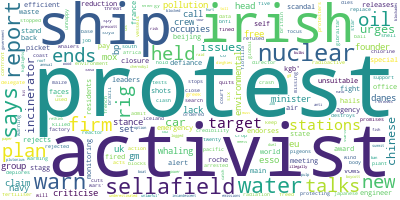

In [16]:
greenpeace = corpus[corpus['company']=='greenpeace']
wordCloud(greenpeace, 'greenpeace')

In [17]:
cs[cs['name']=='greenpeace'].description.values

array(["greenpeace is an independent global campaigning organization acting to change attitudes and behavior, to protect and conserve the environment. it promotes peace by catalyzing an energy revolution, defending oceans, protecting the world's ancient forests, working for disarmament and peace, creating a toxic free future, and campaigning for sustainable agriculture. it is available in more than 40 countries across europe, the americas, asia, africa, and the pacific.   to maintain its independence, greenpeace does not accept donations from governments or corporations but relies on contributions from individual supporters and foundation grants. it has been campaigning against environmental degradation since 1971 when a small boat of volunteers and journalists sailed into amchitka, an area north of alaska where the u.s. government was conducting underground nuclear tests. greenpeace exists to expose environmental criminals, and to challenge government and corporations when they fail t

#### capital Popular Word

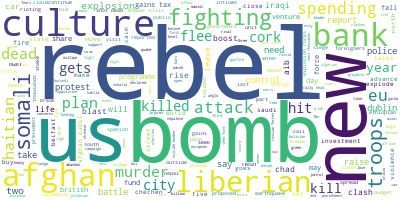

In [18]:
capital = corpus[corpus['company']=='capital']
wordCloud(capital, 'capital')

In [19]:
cs[cs['name']=='capital'].description.values

array(['capital is a bulgarian weekly business newspaper providing unbiased coverage of the current political and economic affairs, analyzes, and supplements. it is preferred mainly by the business community. the newspaper defends the principles of quality journalism, ethical std artists, and responsibility to the readers.   capital was first published in 1993 by the agency for investment information.'],
      dtype=object)

#### game Popular Word

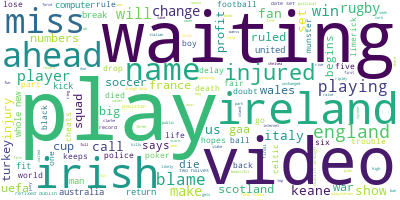

In [20]:
game = corpus[corpus['company']=='game']
wordCloud(game, 'game')

In [21]:
cs[cs['name']=='game'].description.values

array(['games & apps for mobile education studios (games) is a mobile gaming studio that provides full stack game and app development courses on ios and android platform.   since there is a high demand for quality mobile developers, weâ\x80\x99ve stepped forward to fulfill that need. we not only prepare students with programming skills, but also give them hands-on training with interesting development projects.   besides our mobile dev bootcamp, we also provide app and game development consulting services. please contact us if youâ\x80\x99d like to learn more about our services or would like to request a quote.   follow us on twitter @games for latest updates.'],
      dtype=object)

# Propose a modelling technique and the reasons behind your choice
Classification
Regression
Clustering
Time Series Forecast


#### Classification Model

Model will use headline to predict the company

1/ Prepare your datasets 

##### Analytical Base Table

###### Create Document Term Matrix

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
countvec = CountVectorizer()
docu_term_matrix=pd.DataFrame(countvec.fit_transform(corpus.headline_text).toarray(), columns=countvec.get_feature_names())

##### Remove stop words

In [23]:
import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords')
sw = stopwords.words("english")

# add the target
sw.extend(['capital','greenpeace','game'])

# Intersect between document columns and stop words
columns_without_stopwords =list(set(list(docu_term_matrix.columns))- set(sw))
docu_term_matrix =docu_term_matrix[columns_without_stopwords]

##### Select Top Frequency Words (Top 100) - Indepedent Variables

In [24]:
docu_term_matrix_freq= pd.DataFrame(docu_term_matrix.sum().reset_index())
docu_term_matrix_freq= docu_term_matrix_freq.rename(columns={"index": "Word", 0: "Frequency"})
docu_term_matrix_freq= docu_term_matrix_freq.sort_values(by="Frequency",ascending=False)

features = list(docu_term_matrix_freq['Word'].head(100))

docu_term_matrix = docu_term_matrix[features]

##### Merge with Top 100 words - features with target

In [25]:
corpus = corpus.reset_index(drop=True)
analytical_corpus = pd.merge(corpus,docu_term_matrix,left_index=True,right_index=True).drop(columns='headline_text')

In [26]:
analytical_corpus_captial_game = analytical_corpus[analytical_corpus.company != 'greenpeace']

2/ Propose a list of algorithms and how to evaluate them systematically

#### Implement a SVM for Time 
In practial application, I will implement a host of Challenger Algorithms

3/ Choose an algorythm and explain why

In [27]:
analytical_corpus_captial_game.head()

,company,new,us,rebels,afghan,irish,bomb,culture,waiting,plan,...,france,goes,kabul,british,wales,gaa,united,last,six,big
0,capital,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,game,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,game,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,game,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,capital,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
from sklearn.model_selection import train_test_split
train,valid=train_test_split(analytical_corpus_captial_game, random_state=101,test_size=0.2)

In [29]:
train_Y= train[["company"]]
train_X= train.drop(columns=['company'])

In [39]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
svm=model.fit(train_X, train_Y)
svm

C:\Users\Seun\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

4/ Present the results and possible improvements

In [40]:
valid_X= valid.drop(columns=['company']).reset_index(drop=True)
predict = pd.DataFrame(svm.predict(valid_X),columns=['Prediction'])

In [41]:
predict = pd.merge(predict,valid,left_index=True,right_index=True)

Text(0.5, 15.0, 'Actual')

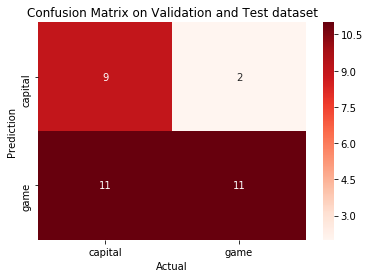

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm_valid = confusion_matrix(predict.Prediction,predict.company)

sns.heatmap(cm_valid,annot=True,fmt="d", xticklabels=["capital","game"], yticklabels=["capital","game"] ,  cmap="Reds");
plt.title("Confusion Matrix on Validation and Test dataset");
plt.ylabel("Prediction");
plt.xlabel("Actual");

In [49]:
predict[predict['company']=='capital'].Prediction.value_counts()

game       11
capital     9
Name: Prediction, dtype: int64

In [50]:
predict[predict['company']=='game'].Prediction.value_counts()

game       11
capital     2
Name: Prediction, dtype: int64

5/ Extra: Build a pipeline / storage utility for the model